In [1]:
import numpy as np
import xarray as xr
import matplotlib.pylab as plt

/home/jol/anaconda3/envs/mapper/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/home/jol/anaconda3/envs/mapper/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
ds_bfill = xr.open_mfdataset('/data2/validations/validate_conc_ice_conc_polstere-100_amsr2-tud_NH_20180101_20181231_bfill.nc')
ds_ffill = xr.open_mfdataset('/data2/validations/validate_conc_ice_conc_polstere-100_amsr2-tud_NH_20180101_20181231_ffill.nc')
# ds = xr.concat([ds_bfill, ds_bfill], dim='time')
ds = ds_ffill

/home/jol/anaconda3/envs/mapper/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


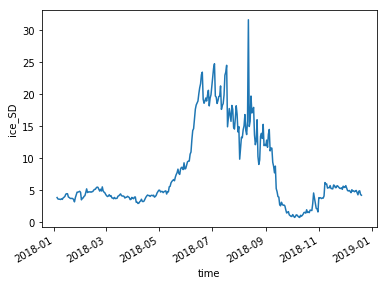

In [3]:
ds.ice_stddev.plot()
plt.show()

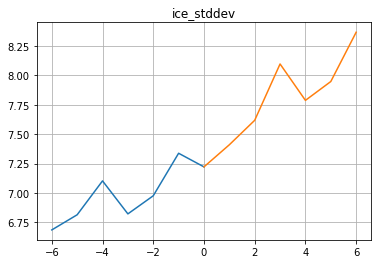

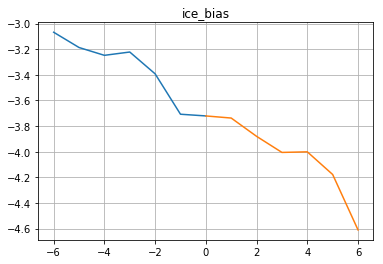

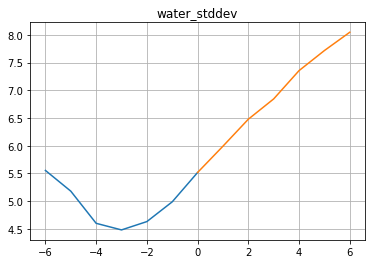

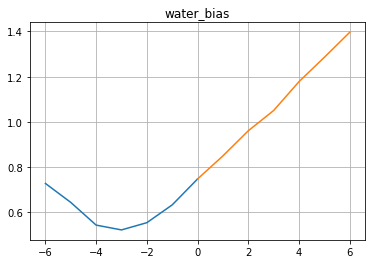

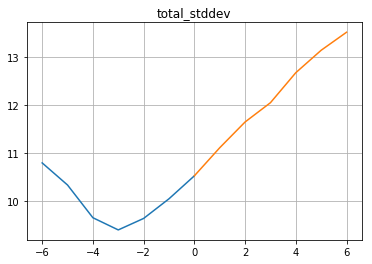

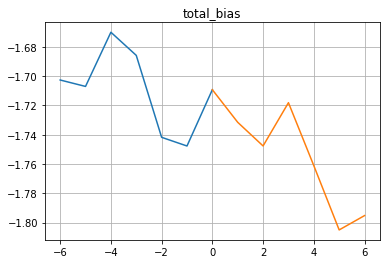

In [11]:
for para in ('ice_stddev', 'ice_bias', 'water_stddev', 'water_bias', 'total_stddev', 'total_bias'):
    for ds in (ds_bfill, ds_ffill):    
        df = ds[[v for v in ds.data_vars if ds[v].dims == ('time', )]].to_dataframe()
        df['diff_days'] = (((df.index - df.times_filled).values.astype(np.int)/10**9)//(60**2 * 24)).astype(np.int)
        df = df[np.abs(df.diff_days) <= 6]
        df = df.sort_values(by='diff_days')
        d, v = list(zip(*[(dd, g[para].mean()) for dd, g  in df.groupby(by='diff_days')]))
        plt.plot(d, v)
        #d, v = list(zip(*[(dd, len(g[para])) for dd, g  in df.groupby(by='diff_days')]))
        #plt.plot(d, v)
    plt.title(f'{para}')
    plt.grid()
    plt.show()

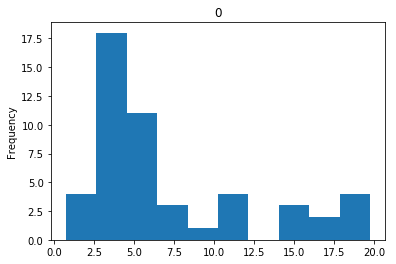

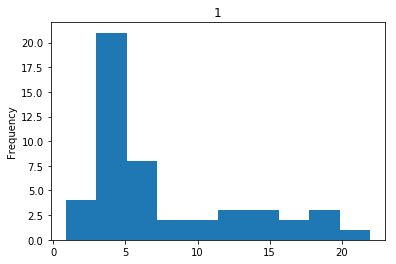

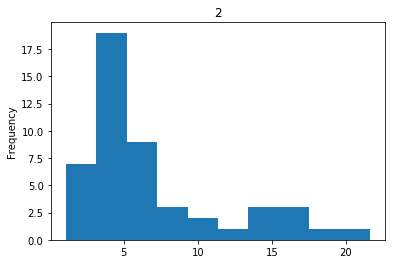

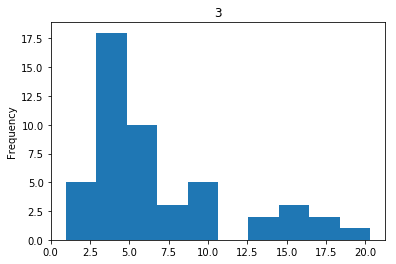

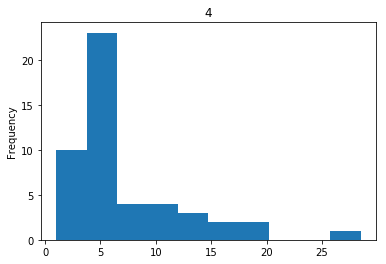

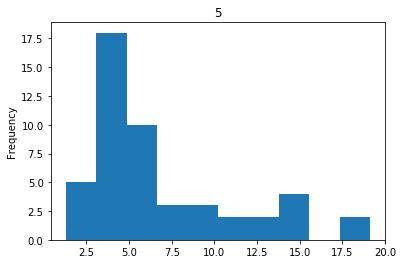

In [101]:
for v, gdf in df.groupby(by='diff_days'):
    gdf.ice_stddev.plot.hist()
    plt.title(v)
    plt.show()

In [18]:
ds = ds_bfill
df = ds[[v for v in ds.data_vars if ds[v].dims == ('time', )]].to_dataframe()
df.index - df.times_filled

time
2018-01-04    0 days
2018-01-05   -6 days
2018-01-06   -5 days
2018-01-07   -4 days
2018-01-08   -3 days
2018-01-09   -2 days
2018-01-10   -1 days
2018-01-11    0 days
2018-01-12   -6 days
2018-01-13   -5 days
2018-01-14   -4 days
2018-01-15   -3 days
2018-01-16   -2 days
2018-01-17   -1 days
2018-01-18    0 days
2018-01-19   -6 days
2018-01-20   -5 days
2018-01-21   -4 days
2018-01-22   -3 days
2018-01-23   -2 days
2018-01-24   -1 days
2018-01-25    0 days
2018-01-26   -6 days
2018-01-27   -5 days
2018-01-28   -4 days
2018-01-29   -3 days
2018-01-30   -2 days
2018-01-31   -1 days
2018-02-01    0 days
2018-02-02   -6 days
               ...  
2018-11-21   -1 days
2018-11-22    0 days
2018-11-23   -6 days
2018-11-24   -5 days
2018-11-25   -4 days
2018-11-26   -3 days
2018-11-27   -2 days
2018-11-28   -1 days
2018-11-29    0 days
2018-11-30   -6 days
2018-12-01   -5 days
2018-12-02   -4 days
2018-12-03   -3 days
2018-12-04   -2 days
2018-12-05   -1 days
2018-12-06    0 days
2018-12-

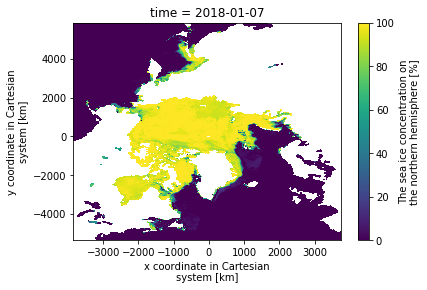

In [47]:
day = ((ds.time - ds.times_filled)/(10**9 * 60**2 * 24)).values.astype(np.int)
ds.isel(time= day == -4).isel(time=0).ice_conc.plot()

In [42]:
day.astype(np.int)

array([  0,  -6,  -5,  -4,  -3,  -2,  -1,   0,  -6,  -5,  -4,  -3,  -2,
        -1,   0,  -6,  -5,  -4,  -3,  -2,  -1,   0,  -6,  -5,  -4,  -3,
        -2,  -1,   0,  -6,  -5,  -4,  -3,  -2,  -1,   0,  -6,  -5,  -4,
        -3,  -2,  -1,   0,  -6,  -5,  -4,  -3,  -2,  -1,   0,  -6,  -5,
        -4,  -3,  -2,  -1,   0,  -6,  -5,  -4,  -3,  -2,  -1,   0,  -6,
        -5,  -4,  -3,  -2,  -1,   0, -13, -12, -11, -10,  -9,  -8,  -7,
        -6,  -5,  -4,  -3,  -2,  -1,   0,  -6,  -5,  -4,  -3,  -2,  -1,
         0,  -6,  -5,  -4,  -3,  -2,  -1,   0,  -6,  -5,  -4,  -3,  -2,
        -1,   0,  -6,  -5,  -4,  -3,  -2,  -1,   0,  -6,  -5,  -4,  -3,
        -2,  -1,   0,  -6,  -5,  -4,  -3,  -2,  -1,   0,  -6,  -5,  -4,
        -3,  -2,  -1,   0,  -6,  -5,  -4,  -3,  -2,  -1,   0,  -6,  -5,
        -4,  -3,  -2,  -1,   0,  -6,  -5,  -4,  -3,  -2,  -1,   0,  -6,
        -5,  -4,  -3,  -2,  -1,   0,  -6,  -5,  -4,  -3,  -2,  -1,   0,
        -6,  -5,  -4,  -3,  -2,  -1,   0,  -6,  -5,  -4,  -3,  -